# Interstellar Navigation System

### Setup

Necessary imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import logging

Logging setup to know what is going on:

In [2]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')

### Generate Planet Data

As test data i am going to generate 50 planets for the dataframe.<br /><br />
Each planet has:
1. Name
2. Coordinates X Y Z (not Equatorial to simplify the project)
3. Gravity value between 0.1 - 20.0

Gravity is displayed as 
$$
g = \frac{m}{s^2}
$$

In [3]:
np.random.seed(42)
planet_data = [
    {
        "name": f"Planet_{i}",
        "coordinates": np.random.uniform(0, 100, 3),
        "gravity": np.random.uniform(0.1, 20.0),  # Gravity in m/s^2
    }
    for i in range(50)
]

df = pd.DataFrame(planet_data)
logging.info("Planet data loaded into DataFrame")
print(df.head())

2024-12-11 19:42:20,780 - Planet data loaded into DataFrame


       name                                        coordinates    gravity
0  Planet_0  [37.454011884736246, 95.07143064099162, 73.199...  12.013304
1  Planet_1  [15.601864044243651, 15.599452033620265, 5.808...  17.336905
2  Planet_2  [60.11150117432088, 70.80725777960456, 2.05844...  19.401206
3  Planet_3  [83.24426408004217, 21.233911067827616, 18.182...   3.749750
4  Planet_4  [30.42422429595377, 52.475643163223786, 43.194...   5.895460


Now we need to define start and end planet

In [4]:
start_index = 0
end_index = len(df) - 1
start_point = df.loc[start_index, "coordinates"]
end_point = df.loc[end_index, "coordinates"]

logging.info(f"Start: {df.loc[start_index, 'name']} at {start_point}")
logging.info(f"End: {df.loc[end_index, 'name']} at {end_point}")

2024-12-11 19:42:20,793 - Start: Planet_0 at [37.45401188 95.07143064 73.19939418]
2024-12-11 19:42:20,794 - End: Planet_49 at [72.59556789 89.711026   88.70864243]
2024-12-11 19:42:20,794 - End: Planet_49 at [72.59556789 89.711026   88.70864243]


NearestNeigbors is trained using the planet coordinates. This algorithm efficiently finds the closest planets to any given point. <br />
The navigation starts at the start planet and continues until it reaches the end planet.

In [5]:
nbrs = NearestNeighbors(n_neighbors=5, algorithm="ball_tree").fit(np.vstack(df["coordinates"]))
logging.info("NearestNeighbors model trained")

2024-12-11 19:42:20,802 - NearestNeighbors model trained


The algorithm will keep track of visited planets, current position and updated path. <br />
For each step algorithm finds closest planet and excludes already visited <br />
Chooses the next planet based on a "slingshot effect", shortest distance adjusted by gravity

In [6]:
current_point = start_point
path = [start_point]
visited = {start_index}

while not np.allclose(current_point, end_point):
    distances, indices = nbrs.kneighbors([current_point])
    neighbors = indices[0]
    logging.info(f"Current Point: {current_point}")
    logging.info(f"Neighbor Indices: {neighbors}")
    
    # Exclude visited points
    valid_neighbors = [(idx, distances[0][i]) for i, idx in enumerate(neighbors) if idx not in visited]
    if not valid_neighbors:
        logging.warning("No unvisited neighbors found; breaking loop")
        break

    # Choose the next point considering gravity (slingshot effect)
    next_index = min(valid_neighbors, key=lambda x: x[1] - df.loc[x[0], "gravity"])[0]
    current_point = df.loc[next_index, "coordinates"]
    path.append(current_point)
    visited.add(next_index)
logging.info("Pathfinding complete")

2024-12-11 19:42:20,813 - Current Point: [37.45401188 95.07143064 73.19939418]
2024-12-11 19:42:20,814 - Neighbor Indices: [ 0 17 46 40  8]
2024-12-11 19:42:20,815 - Current Point: [25.79416277 65.9984046  81.72222002]
2024-12-11 19:42:20,816 - Neighbor Indices: [46 40 31 38 42]
2024-12-11 19:42:20,818 - Current Point: [22.79351625 42.71077886 81.80147659]
2024-12-11 19:42:20,818 - Neighbor Indices: [31 21 33 38 15]
2024-12-11 19:42:20,820 - Current Point: [31.09823217 32.5183322  72.96061783]
2024-12-11 19:42:20,821 - Neighbor Indices: [21 15 31  9 43]
2024-12-11 19:42:20,822 - Current Point: [38.86772897 27.13490318 82.87375092]
2024-12-11 19:42:20,814 - Neighbor Indices: [ 0 17 46 40  8]
2024-12-11 19:42:20,815 - Current Point: [25.79416277 65.9984046  81.72222002]
2024-12-11 19:42:20,816 - Neighbor Indices: [46 40 31 38 42]
2024-12-11 19:42:20,818 - Current Point: [22.79351625 42.71077886 81.80147659]
2024-12-11 19:42:20,818 - Neighbor Indices: [31 21 33 38 15]
2024-12-11 19:42:20,

Let's display the coordinate path

In [7]:
logging.info("Path is:")
for planet in path:
    logging.info(planet)

2024-12-11 19:42:20,841 - Path is:
2024-12-11 19:42:20,842 - [37.45401188 95.07143064 73.19939418]
2024-12-11 19:42:20,843 - [25.79416277 65.9984046  81.72222002]
2024-12-11 19:42:20,843 - [22.79351625 42.71077886 81.80147659]
2024-12-11 19:42:20,843 - [31.09823217 32.5183322  72.96061783]
2024-12-11 19:42:20,843 - [38.86772897 27.13490318 82.87375092]
2024-12-11 19:42:20,844 - [34.10663511 11.34735212 92.46936183]
2024-12-11 19:42:20,844 - [54.67102793 18.48544555 96.95846278]
2024-12-11 19:42:20,844 - [80.36720769 18.65700589 89.25589985]
2024-12-11 19:42:20,845 - [69.09377381 38.67353463 93.67299887]
2024-12-11 19:42:20,845 - [76.07850486 56.12771976 77.096718  ]
2024-12-11 19:42:20,845 - [92.96976523 80.81203796 63.34037565]
2024-12-11 19:42:20,846 - [93.94989416 89.48273504 59.78999788]
2024-12-11 19:42:20,846 - [72.59556789 89.711026   88.70864243]
2024-12-11 19:42:20,842 - [37.45401188 95.07143064 73.19939418]
2024-12-11 19:42:20,843 - [25.79416277 65.9984046  81.72222002]
2024-

And generate plot displaying the route

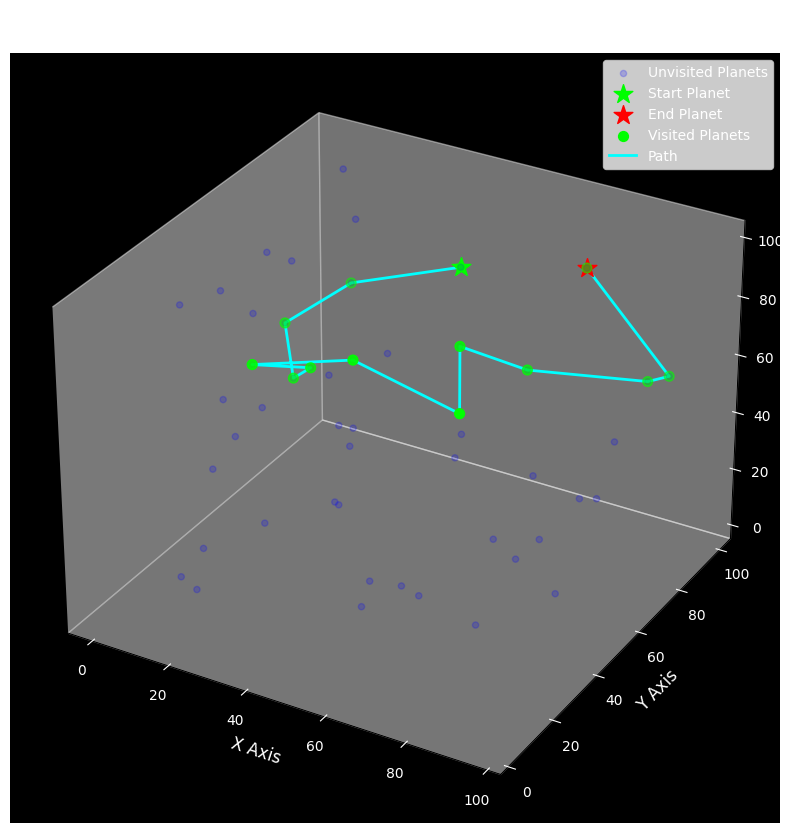

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d', facecolor='black')

# Plot all planets (blue with low opacity)
all_coords = np.vstack(df["coordinates"])
ax.scatter(all_coords[:, 0], all_coords[:, 1], all_coords[:, 2], 
           color='blue', alpha=0.2, label='Unvisited Planets')

# Plot the start planet (green star)
ax.scatter(start_point[0], start_point[1], start_point[2], 
           color='lime', marker='*', s=200, label='Start Planet')

# Plot the end planet (red star)
ax.scatter(end_point[0], end_point[1], end_point[2], 
           color='red', marker='*', s=200, label='End Planet')

# Plot the visited planets (green circles)
path_coords = np.array(path)
ax.scatter(path_coords[:, 0], path_coords[:, 1], path_coords[:, 2], 
           color='lime', marker='o', s=50, label='Visited Planets')

# Plot the path (cyan lines)
ax.plot(path_coords[:, 0], path_coords[:, 1], path_coords[:, 2], 
        color='cyan', linewidth=2, label='Path')

# Enhance the 3D plot
ax.set_title("Pathfinding Visualization", color='white', fontsize=16, pad=20)
ax.grid(False)  # Turn off grid to keep it clean
ax.set_facecolor("black")  # Dark background for the plot

# Adjust axes labels and ticks for visibility
ax.set_xlabel("X Axis", color="white", fontsize=12)
ax.set_ylabel("Y Axis", color="white", fontsize=12)
ax.set_zlabel("Z Axis", color="white", fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10, colors='white')

# Adjust legend
legend = ax.legend(loc="upper right", fontsize=10)
for text in legend.get_texts():
    text.set_color("white")  # Make legend text visible

# Show the plot
plt.show()